(100,) (2, 100, 1)


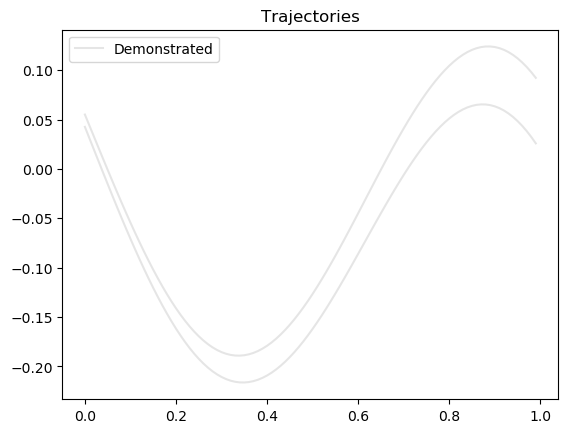

In [1]:
import numpy as np
from movement_primitives.dmp import DMP
import matplotlib.pyplot as plt

x = np.arange(0,1.00,0.01)
nrTraj=2
sigmaNoise=0.02

A = np.array([.2, .2, .01, -.05])
X = np.vstack((np.sin(5*x), x**2, x, np.ones((1,len(x)))))
Y = np.zeros((nrTraj, len(x)))

for traj in range(nrTraj):
    sample = -np.dot(A + sigmaNoise * np.random.randn(1,4), X)[0]
    Y[traj] = sample
    label = 'Demonstrated' if traj==0 else ''
    plt.plot(x, sample, 'gray', label=label, alpha=0.2)

plt.legend()
plt.title('Trajectories')

Y = np.expand_dims(Y, -1)
print(x.shape, Y.shape)

In [2]:
_, n_steps, n_dims = Y.shape
dt = 1/n_steps

d = DMP(n_dims=n_dims, n_weights_per_dim=6, dt=dt)
d.imitate(x, Y[0])

forcing_term_values = []
for t in np.arange(0, 1, dt):
    z = d.forcing_term.phase(t)  # Calculate the phase
    forcing_term = d.forcing_term.forcing_term(z).squeeze()
    forcing_term_values.append(forcing_term)

forcing_term_values = np.array(forcing_term_values)

In [3]:
# print(forcing_term_values.shape)
# print(forcing_term_values)
# print(Y[0])

0.0 0.01 [-0.04487883] [0.] [0.09226744] [0.] [0.] [-0.04487883] [0.] [0.] 1.0 0.0 25.0 6.25 <movement_primitives.dmp._forcing_term.ForcingTerm object at 0x7fc02ab31ac0> None 0.001 False
0.01 0.02 [-0.04548001] [-0.12092995] [0.09226744] [0.] [0.] [-0.04487883] [0.] [0.] 1.0 0.0 25.0 6.25 <movement_primitives.dmp._forcing_term.ForcingTerm object at 0x7fc02ab31ac0> None 0.001 False
0.02 0.03 [-0.0472985] [-0.24223394] [0.09226744] [0.] [0.] [-0.04487883] [0.] [0.] 1.0 0.0 25.0 6.25 <movement_primitives.dmp._forcing_term.ForcingTerm object at 0x7fc02ab31ac0> None 0.001 False
0.03 0.04 [-0.05030359] [-0.35725057] [0.09226744] [0.] [0.] [-0.04487883] [0.] [0.] 1.0 0.0 25.0 6.25 <movement_primitives.dmp._forcing_term.ForcingTerm object at 0x7fc02ab31ac0> None 0.001 False
0.04 0.05 [-0.05440505] [-0.46075987] [0.09226744] [0.] [0.] [-0.04487883] [0.] [0.] 1.0 0.0 25.0 6.25 <movement_primitives.dmp._forcing_term.ForcingTerm object at 0x7fc02ab31ac0> None 0.001 False
0.05 0.06 [-0.05946792] [-

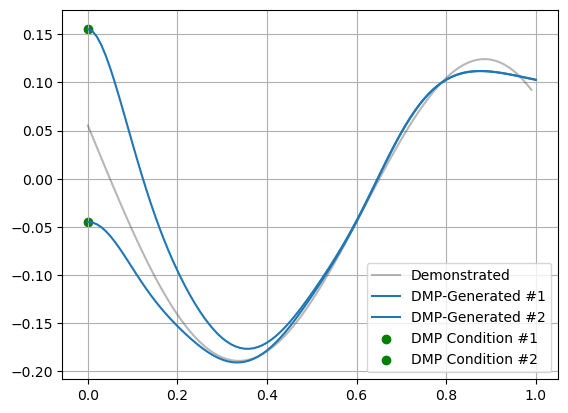

In [4]:
from copy import deepcopy

# plt.plot(x, forcing_term_values/100, label='Forcing Term/100', color='red', alpha=0.5)
plt.plot(x, Y[0].squeeze(), label='Demonstrated', color='#4d4d4d', alpha=0.4)


start = Y[0][0] - 0.1
plt.scatter(0, start, color='green', label='DMP Condition #1')

d_ = deepcopy(d)
d_.configure(start_y=start)
t, traj1 = d_.open_loop()
p = plt.plot(t, traj1.squeeze(), label='DMP-Generated #1')

start = Y[0][0] + 0.1
plt.scatter(0, start, color='green', label='DMP Condition #2')

d_.configure(start_y=start)
t, traj2 = d_.open_loop()
plt.plot(t, traj2.squeeze(), color=p[0].get_color(), label='DMP-Generated #2')

plt.legend()
plt.grid()

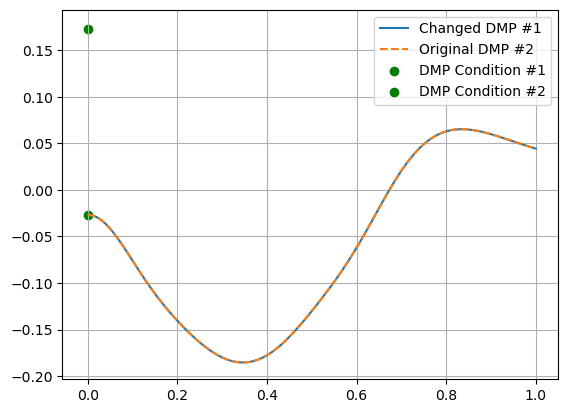

In [5]:
new_fs = forcing_term_values

new_fs+=np.random.rand(*new_fs.shape)*1000
d_ = deepcopy(d)
d_.forcing_term.weights = new_fs

start = Y[0][0] - 0.1
plt.scatter(0, start, color='green', label='DMP Condition #1')

d_.configure(start_y=start)
t, traj1_ = d_.open_loop()
p = plt.plot(t, traj1_.squeeze(), label='Changed DMP #1')

start = Y[0][0] + 0.1
plt.scatter(0, start, color='green', label='DMP Condition #2')

d_.configure(start_y=start)
t, traj2_ = d_.open_loop()
# plt.plot(t, traj2_.squeeze(), color=p[0].get_color(), label='Changed DMP #2', alpha=0.5)
p = plt.plot(t, traj1.squeeze(), label='Original DMP #2', linestyle='--')
# plt.plot(t, traj2.squeeze(), color=p[0].get_color(), label='Original DMP #2')

plt.legend()
plt.grid()

In [6]:
for i in range(100):
    print(traj1[i], traj1_[i])

[-0.07783284] [-0.07783284]
[-0.07829667] [-0.07829667]
[-0.07970998] [-0.07970998]
[-0.0820622] [-0.0820622]
[-0.08529434] [-0.08529434]
[-0.08931086] [-0.08931086]
[-0.09399119] [-0.09399119]
[-0.09920044] [-0.09920044]
[-0.10479897] [-0.10479897]
[-0.11065052] [-0.11065052]
[-0.11662902] [-0.11662902]
[-0.12262391] [-0.12262391]
[-0.12854397] [-0.12854397]
[-0.13431957] [-0.13431957]
[-0.13990308] [-0.13990308]
[-0.14526763] [-0.14526763]
[-0.1504041] [-0.1504041]
[-0.15531691] [-0.15531691]
[-0.16001901] [-0.16001901]
[-0.1645267] [-0.1645267]
[-0.16885504] [-0.16885504]
[-0.17301424] [-0.17301424]
[-0.17700738] [-0.17700738]
[-0.18082946] [-0.18082946]
[-0.18446763] [-0.18446763]
[-0.18790235] [-0.18790235]
[-0.19110902] [-0.19110902]
[-0.19405995] [-0.19405995]
[-0.19672606] [-0.19672606]
[-0.1990785] [-0.1990785]
[-0.20108972] [-0.20108972]
[-0.20273424] [-0.20273424]
[-0.20398899] [-0.20398899]
[-0.20483352] [-0.20483352]
[-0.2052501] [-0.2052501]
[-0.205224] [-0.205224]
[-0.20